<a href="https://colab.research.google.com/github/twoandhalfben/workflow/blob/main/Augmented_NBA_Database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import sqlite3
import pandas as pd
import numpy as np

In [ ]:
# creating in-memory database for prototyping
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

In [ ]:
# tabulating
cursor.execute('''
    CREATE TABLE IF NOT EXISTS nba_stats (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        player_name TEXT NOT NULL,
        team_name TEXT NOT NULL,
        points INTEGER DEFAULT 0,
        assists INTEGER DEFAULT 0,
        rebounds INTEGER DEFAULT 0
    )
''')
conn.commit()

In [ ]:
# adding some player data to my database
sample_data_1 = [
    ("LeBron James", "Lakers", 35, 8, 7),
    ("Stephen Curry", "Warriors", 40, 10, 5),
    ("Kevin Durant", "Suns", 25, 6, 9),
    ("Giannis Antetokounmpo", "Bucks", 30, 5, 11),
    ("Jayson Tatum", "Celtics", 34, 4, 8),
    ("Luka Doncic", "Mavericks", 36, 9, 7),
    ("Nikola Jokic", "Nuggets", 28, 8, 14),
    ("Ja Morant", "Grizzlies", 32, 10, 6),
    ("Jimmy Butler", "Heat", 27, 5, 7),
    ("Kawhi Leonard", "Clippers", 26, 6, 5),
    ("Pat Connaughton", "Bucks", 17, 5, 3)
]



In [ ]:
sample_data_2 = [
    ("Anthony Davis", "Lakers", 31, 3, 12),
    ("Damian Lillard", "Bucks", 29, 8, 4),
    ("Devin Booker", "Suns", 26, 5, 5),
    ("James Harden", "Clippers", 20, 11, 4),
    ("Chris Paul", "Warriors", 18, 12, 3),
    ("Kyrie Irving", "Mavericks", 25, 7, 4),
    ("Joel Embiid", "76ers", 33, 4, 10),
    ("Zion Williamson", "Pelicans", 27, 3, 8),
    ("Trae Young", "Hawks", 28, 10, 4),
    ("Paul George", "Clippers", 24, 6, 6)
]


In [ ]:
sample_data_3 = [
    ("Bradley Beal", "Suns", 23, 5, 4),
    ("Jaylen Brown", "Celtics", 26, 3, 6),
    ("DeMar DeRozan", "Bulls", 24, 4, 5),
    ("Rudy Gobert", "Timberwolves", 12, 2, 15),
    ("Karl-Anthony Towns", "Timberwolves", 23, 3, 9),
    ("Shai Gilgeous-Alexander", "Thunder", 31, 6, 4),
    ("Donovan Mitchell", "Cavaliers", 28, 5, 4),
    ("Jamal Murray", "Nuggets", 23, 6, 4),
    ("Draymond Green", "Warriors", 8, 8, 8),
    ("Andrew Wiggins", "Warriors", 17, 2, 5)
]


In [ ]:
# aggregating data batches
all_data = sample_data_1 + sample_data_2 + sample_data_3

cursor.executemany('''
  INSERT INTO nba_stats (player_name, team_name, points, assists, rebounds)
    VALUES (?, ?, ?, ?, ?)
''', all_data)
conn.commit()


In [ ]:
# using SQL to fetch all data
cursor.execute("SELECT * FROM nba_stats")
rows = cursor.fetchall()

# print
for row in rows:
    print(row)

(1, 'LeBron James', 'Lakers', 35, 8, 7)
(2, 'Stephen Curry', 'Warriors', 40, 10, 5)
(3, 'Kevin Durant', 'Suns', 25, 6, 9)
(4, 'Giannis Antetokounmpo', 'Bucks', 30, 5, 11)
(5, 'Jayson Tatum', 'Celtics', 34, 4, 8)
(6, 'Luka Doncic', 'Mavericks', 36, 9, 7)
(7, 'Nikola Jokic', 'Nuggets', 28, 8, 14)
(8, 'Ja Morant', 'Grizzlies', 32, 10, 6)
(9, 'Jimmy Butler', 'Heat', 27, 5, 7)
(10, 'Kawhi Leonard', 'Clippers', 26, 6, 5)
(11, 'Pat Connaughton', 'Bucks', 17, 5, 3)
(12, 'Anthony Davis', 'Lakers', 31, 3, 12)
(13, 'Damian Lillard', 'Bucks', 29, 8, 4)
(14, 'Devin Booker', 'Suns', 26, 5, 5)
(15, 'James Harden', 'Clippers', 20, 11, 4)
(16, 'Chris Paul', 'Warriors', 18, 12, 3)
(17, 'Kyrie Irving', 'Mavericks', 25, 7, 4)
(18, 'Joel Embiid', '76ers', 33, 4, 10)
(19, 'Zion Williamson', 'Pelicans', 27, 3, 8)
(20, 'Trae Young', 'Hawks', 28, 10, 4)
(21, 'Paul George', 'Clippers', 24, 6, 6)
(22, 'Bradley Beal', 'Suns', 23, 5, 4)
(23, 'Jaylen Brown', 'Celtics', 26, 3, 6)
(24, 'DeMar DeRozan', 'Bulls', 24, 4

In [ ]:
# using pandas to read the data
df = pd.read_sql_query("SELECT * FROM nba_stats", conn)
print(df)

    id              player_name     team_name  points  assists  rebounds
0    1             LeBron James        Lakers      35        8         7
1    2            Stephen Curry      Warriors      40       10         5
2    3             Kevin Durant          Suns      25        6         9
3    4    Giannis Antetokounmpo         Bucks      30        5        11
4    5             Jayson Tatum       Celtics      34        4         8
5    6              Luka Doncic     Mavericks      36        9         7
6    7             Nikola Jokic       Nuggets      28        8        14
7    8                Ja Morant     Grizzlies      32       10         6
8    9             Jimmy Butler          Heat      27        5         7
9   10            Kawhi Leonard      Clippers      26        6         5
10  11          Pat Connaughton         Bucks      17        5         3
11  12            Anthony Davis        Lakers      31        3        12
12  13           Damian Lillard         Bucks      

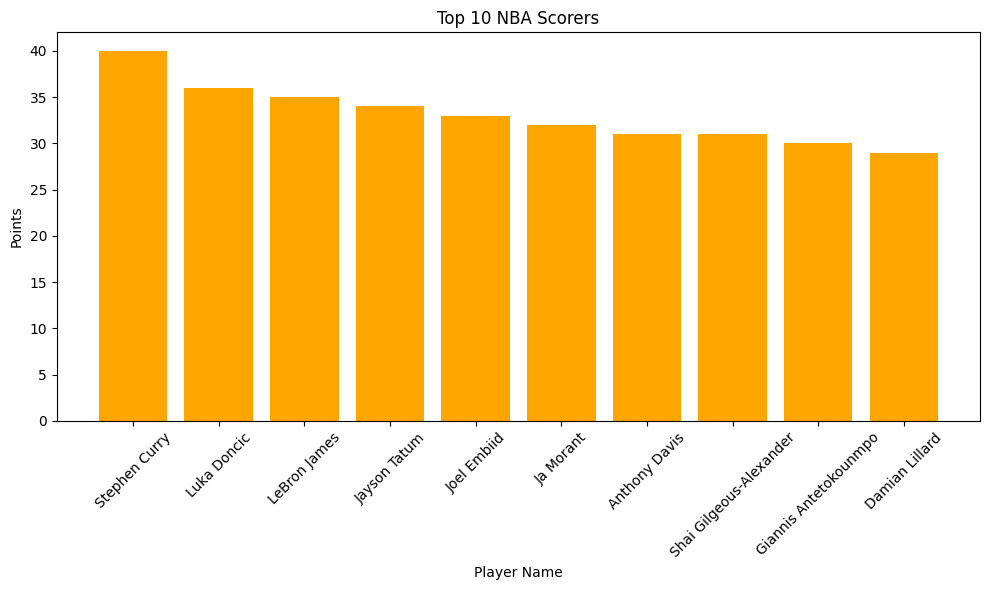

In [ ]:
# running a data viz
top_scorers = df.sort_values(by='points', ascending=False).head(10)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(top_scorers['player_name'], top_scorers['points'], color='orange')
plt.xlabel('Player Name')
plt.ylabel('Points')
plt.title('Top 10 NBA Scorers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# now i am going to automate the generation of player data to generate 1000 players
import random

# base players to derive new data
base_players = [
    ("LeBron James", "Lakers", 35, 8, 7),
    ("Stephen Curry", "Warriors", 40, 10, 5),
    ("Kevin Durant", "Suns", 25, 6, 9),
    ("Giannis Antetokounmpo", "Bucks", 30, 5, 11),
    ("Jayson Tatum", "Celtics", 34, 4, 8),
    ("Luka Dončić", "Mavericks", 36, 9, 7),
    ("Nikola Jokić", "Nuggets", 28, 8, 14),
    ("Ja Morant", "Grizzlies", 32, 10, 6),
    ("Jimmy Butler", "Heat", 27, 5, 7),
    ("Kawhi Leonard", "Clippers", 26, 6, 5),
      ("Pat Connaughton", "Bucks", 17, 5, 3),
]


# team pool to randomize assignments
teams = [
    "Lakers", "Warriors", "Suns", "Bucks", "Celtics", "Mavericks", "Nuggets",
    "Grizzlies", "Heat", "Clippers", "76ers", "Hawks", "Pelicans", "Thunder",
    "Bulls", "Knicks", "Raptors", "Spurs", "Cavaliers", "Jazz"
]

# generate 1000 players
player_data = []
for i in range(1000):
    base_player = random.choice(base_players)
    player_name = f"{base_player[0]}_{i}"  # add a unique suffix to each name
    team_name = random.choice(teams)
    points = base_player[2] + random.randint(-5, 5)  # add variability
    assists = base_player[3] + random.randint(-2, 2)
    rebounds = base_player[4] + random.randint(-3, 3)
    player_data.append((player_name, team_name, points, assists, rebounds))


In [ ]:
# insert augmented player data into database
cursor.executemany('''
    INSERT INTO nba_stats (player_name, team_name, points, assists, rebounds)
    VALUES (?, ?, ?, ?, ?)
''', player_data)
conn.commit()


In [ ]:
# fetching amount of players to verify correct... should be 1031 players total
    cursor.execute("SELECT COUNT(*) FROM nba_stats")
      total_players = cursor.fetchone()[0]
          print(f"Total Players: {total_players}")  # should print 1000

# fetch and display the first 10 rows
    cursor.execute("SELECT * FROM nba_stats LIMIT 10")
      rows = cursor.fetchall()
        for row in rows:
           print(row)


Total Players: 1031
(1, 'LeBron James', 'Lakers', 35, 8, 7)
(2, 'Stephen Curry', 'Warriors', 40, 10, 5)
(3, 'Kevin Durant', 'Suns', 25, 6, 9)
(4, 'Giannis Antetokounmpo', 'Bucks', 30, 5, 11)
(5, 'Jayson Tatum', 'Celtics', 34, 4, 8)
(6, 'Luka Doncic', 'Mavericks', 36, 9, 7)
(7, 'Nikola Jokic', 'Nuggets', 28, 8, 14)
(8, 'Ja Morant', 'Grizzlies', 32, 10, 6)
(9, 'Jimmy Butler', 'Heat', 27, 5, 7)
(10, 'Kawhi Leonard', 'Clippers', 26, 6, 5)


In [ ]:
# analysis
  df = pd.read_sql_query("SELECT * FROM nba_stats", conn)


    print(df[['points', 'assists', 'rebounds']].describe())


            points      assists     rebounds
count  1031.000000  1031.000000  1031.000000
mean     30.084384     6.847721     7.467507
std       6.814865     2.485900     3.415650
min       8.000000     2.000000     0.000000
25%      25.000000     5.000000     5.000000
50%      30.000000     7.000000     7.000000
75%      35.000000     9.000000     9.000000
max      45.000000    12.000000    17.000000


In [ ]:
# messing around
df = pd.read_sql_query("SELECT * FROM nba_stats ", conn)


    print(df[['points', 'assists']].describe())


            points      assists
count  1031.000000  1031.000000
mean     30.084384     6.847721
std       6.814865     2.485900
min       8.000000     2.000000
25%      25.000000     5.000000
50%      30.000000     7.000000
75%      35.000000     9.000000
max      45.000000    12.000000


In [ ]:
import random

# base players to expand data
base_players = [
    ("LeBron James", "Lakers", 35, 8, 7),
    ("Stephen Curry", "Warriors", 40, 10, 5),
    ("Kevin Durant", "Suns", 25, 6, 9),
    ("Giannis Antetokounmpo", "Bucks", 30, 5, 11),
    ("Jayson Tatum", "Celtics", 34, 4, 8),
    ("Luka Dončić", "Mavericks", 36, 9, 7),
    ("Nikola Jokić", "Nuggets", 28, 8, 14),
    ("Ja Morant", "Grizzlies", 32, 10, 6),
    ("Jimmy Butler", "Heat", 27, 5, 7),
    ("Kawhi Leonard", "Clippers", 26, 6, 5)
]

teams = [
    "Lakers", "Warriors", "Suns", "Bucks", "Celtics", "Mavericks", "Nuggets",
      "Grizzlies", "Heat", "Clippers", "76ers", "Hawks", "Pelicans", "Thunder",
         "Bulls", "Knicks", "Raptors", "Spurs", "Cavaliers", "Jazz"
]

# create data function
def generate_large_dataset(base_players, num_rows=1000000):
    large_dataset = []
    for i in range(num_rows):
        base_player = random.choice(base_players)
        player_name = f"{base_player[0]}_{i}"
        team_name = random.choice(teams)
        points = max(0, base_player[2] + random.randint(-10, 10))
        assists = max(0, base_player[3] + random.randint(-3, 3))
        rebounds = max(0, base_player[4] + random.randint(-5, 5))
        large_dataset.append((player_name, team_name, points, assists, rebounds))
    return large_dataset

# generate 1 million rows
     large_dataset = generate_large_dataset(base_players, num_rows=1000000)



In [ ]:
# retrieve top 15 players with the highest points scored
query = '''
SELECT player_name, team_name, points
  FROM nba_stats
  ORDER BY points DESC
LIMIT 15
'''
cursor.execute(query)
result = cursor.fetchall()


for row in result:
    print(row)


('Stephen Curry_59', '76ers', 45)
('Stephen Curry_94', 'Lakers', 45)
('Stephen Curry_114', 'Grizzlies', 45)
('Stephen Curry_217', 'Warriors', 45)
('Stephen Curry_303', 'Knicks', 45)
('Stephen Curry_405', 'Mavericks', 45)
('Stephen Curry_451', 'Cavaliers', 45)
('Stephen Curry_472', 'Warriors', 45)
('Stephen Curry_510', 'Knicks', 45)
('Stephen Curry_37', 'Knicks', 44)
('Stephen Curry_92', 'Warriors', 44)
('Stephen Curry_120', 'Spurs', 44)
('Stephen Curry_165', 'Mavericks', 44)
('Stephen Curry_312', 'Grizzlies', 44)
('Stephen Curry_385', 'Bulls', 44)


In [ ]:
# this algorithm to determine efficiency assumes points are proportional to shot attempts, and calculates "efficiency" based on points per stat action
query = '''
  SELECT player_name, team_name,
           points, assists, rebounds,
           ROUND((points + assists * 2 + rebounds * 1.5) / (points + assists + rebounds), 2) AS efficiency
  FROM nba_stats
  ORDER BY efficiency DESC
  LIMIT 10;
'''


cursor.execute(query)
results = cursor.fetchall()


print("Player Efficiency Rankings:")
for row in results:
    print(row)


Player Efficiency Rankings:
('Draymond Green', 'Warriors', 8, 8, 8, 1.5)
('Chris Paul', 'Warriors', 18, 12, 3, 1.41)
('Pat Connaughton_61', 'Clippers', 12, 7, 2, 1.38)
('Pat Connaughton_263', 'Hawks', 12, 6, 6, 1.38)
('Pat Connaughton_649', 'Clippers', 13, 7, 5, 1.38)
('James Harden', 'Clippers', 20, 11, 4, 1.37)
('Pat Connaughton_663', 'Pelicans', 14, 7, 5, 1.37)
('Pat Connaughton_115', 'Jazz', 15, 7, 6, 1.36)
('Nikola Jokić_453', 'Cavaliers', 23, 10, 13, 1.36)
('Nikola Jokić_659', 'Spurs', 23, 10, 12, 1.36)


In [ ]:
# average performance metrics per team
query = '''
  SELECT team_name,
           ROUND(AVG(points), 2) AS avg_points,
           ROUND(AVG(assists), 2) AS avg_assists,
           ROUND(AVG(rebounds), 2) AS avg_rebounds
  FROM nba_stats
  GROUP BY team_name
  ORDER BY avg_points DESC;
'''
cursor.execute(query)
results = cursor.fetchall()

print("Average Performance Metrics Per Team:")
for row in results:
    print(row)


Average Performance Metrics Per Team:
('Celtics', 31.84, 6.95, 7.42)
('Warriors', 30.93, 7.24, 7.69)
('Knicks', 30.9, 6.67, 7.77)
('76ers', 30.57, 6.83, 7.87)
('Spurs', 30.51, 7.0, 6.91)
('Clippers', 30.44, 6.69, 6.92)
('Mavericks', 30.39, 7.17, 7.06)
('Heat', 30.29, 6.79, 7.88)
('Cavaliers', 30.29, 7.07, 6.89)
('Grizzlies', 29.97, 7.12, 7.86)
('Bucks', 29.89, 6.77, 7.67)
('Jazz', 29.88, 7.29, 7.55)
('Hawks', 29.88, 7.45, 7.55)
('Nuggets', 29.83, 6.9, 7.28)
('Suns', 29.69, 6.57, 7.14)
('Thunder', 29.47, 6.24, 7.61)
('Lakers', 29.45, 6.93, 6.7)
('Raptors', 29.43, 6.57, 7.91)
('Pelicans', 29.14, 6.14, 7.95)
('Bulls', 28.79, 6.48, 7.83)
('Timberwolves', 17.5, 2.5, 12.0)


In [ ]:
# players with triple-doubles
query = '''
SELECT player_name, team_name, points, assists, rebounds
  FROM nba_stats
  WHERE points >= 10 AND assists >= 10 AND rebounds >= 10;
'''
cursor.execute(query)
results = cursor.fetchall()

print("Players with Triple-Doubles:")
for row in results:
    print(row)


Players with Triple-Doubles:
('Luka Dončić_18', 'Nuggets', 41, 11, 10)
('Nikola Jokić_189', 'Raptors', 27, 10, 15)
('LeBron James_205', 'Cavaliers', 32, 10, 10)
('Nikola Jokić_288', 'Grizzlies', 31, 10, 13)
('Nikola Jokić_358', 'Heat', 27, 10, 13)
('Nikola Jokić_384', 'Warriors', 32, 10, 14)
('LeBron James_390', 'Cavaliers', 31, 10, 10)
('Nikola Jokić_437', 'Lakers', 33, 10, 13)
('Nikola Jokić_453', 'Cavaliers', 23, 10, 13)
('Nikola Jokić_530', 'Grizzlies', 25, 10, 15)
('Luka Dončić_572', 'Cavaliers', 32, 11, 10)
('Nikola Jokić_659', 'Spurs', 23, 10, 12)
('Nikola Jokić_766', '76ers', 30, 10, 13)
('Nikola Jokić_891', 'Mavericks', 26, 10, 17)
('Nikola Jokić_909', '76ers', 28, 10, 15)
('Nikola Jokić_917', 'Pelicans', 31, 10, 11)
('LeBron James_939', 'Bucks', 40, 10, 10)
('Nikola Jokić_966', 'Hawks', 31, 10, 16)
('Nikola Jokić_972', '76ers', 25, 10, 11)
('Nikola Jokić_977', 'Hawks', 27, 10, 15)
('Nikola Jokić_987', 'Grizzlies', 24, 10, 13)


       Team Name  Total Points
0       Clippers          1857
1       Warriors          1794
2        Nuggets          1790
3        Celtics          1751
4      Grizzlies          1738
5          Bucks          1704
6          Spurs          1678
7      Cavaliers          1666
8      Mavericks          1641
9        Thunder          1503
10        Knicks          1483
11          Jazz          1464
12         Hawks          1464
13          Suns          1455
14         76ers          1437
15       Raptors          1383
16         Bulls          1382
17        Lakers          1296
18          Heat          1272
19      Pelicans          1224
20  Timberwolves            35


<Axes: title={'center': 'Total Points by Team'}, xlabel='Team Name'>

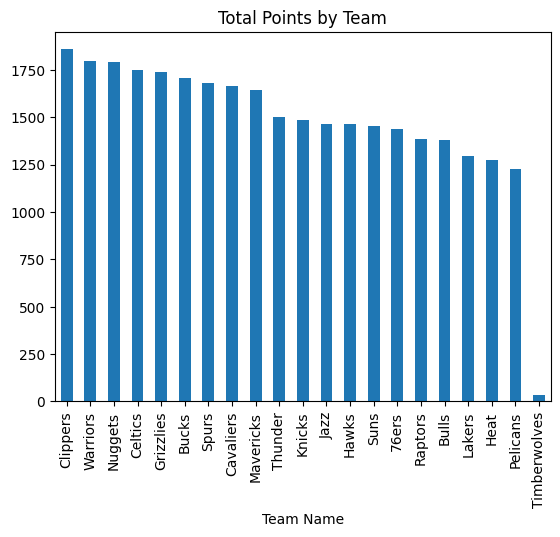

In [ ]:
# visualization for total points per team
import pandas as pd

query = '''
  SELECT team_name, SUM(points) AS total_points
    FROM nba_stats
    GROUP BY team_name
    ORDER BY total_points DESC;
'''
cursor.execute(query)
results = cursor.fetchall()

# convert
df = pd.DataFrame(results, columns=['Team Name', 'Total Points'])


    print(df)

        df.plot(x='Team Name', y='Total Points', kind='bar', legend=False, title='Total Points by Team')


In [ ]:
# going to try and augment another 10 million random player records
# i need to update/modify the table schema first to add a 'year' column

cursor.execute('''
    CREATE TABLE IF NOT EXISTS nba_stats (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        player_name TEXT NOT NULL,
        team_name TEXT NOT NULL,
        points INTEGER DEFAULT 0,
        assists INTEGER DEFAULT 0,
        rebounds INTEGER DEFAULT 0,
        year INTEGER NOT NULL
    )
''')
conn.commit()


In [ ]:
# updated function to include 'year' column
# went back and changed rows from 1 mil to 100,000

import random

def generate_historical_data(num_records=100000):

    teams = ["Lakers", "Warriors", "Suns", "Bucks", "Celtics", "Mavericks", "Nuggets", "Grizzlies", "Heat", "Clippers"]

    # new synthetic data
    data = []
    for _ in range(num_records):
        player_name = f"Player_{random.randint(1, num_records)}"  # random names
        team_name = random.choice(teams)
        points = random.randint(0, 50)   # points
        assists = random.randint(0, 15)  # assists
        rebounds = random.randint(0, 20)  # rebounds
        year = random.randint(1980, 2024)  # years between 1980 2024
        data.append((player_name, team_name, points, assists, rebounds, year))
    return data


In [ ]:
# count total rows in table
cursor.execute('SELECT COUNT(*) FROM nba_stats')
total_rows = cursor.fetchone()[0]
print(f"Total rows in the database: {total_rows}")

# query sample of the data
cursor.execute('SELECT * FROM nba_stats LIMIT 250')
sample_rows = cursor.fetchall()
for row in sample_rows:
    print(row)


Total rows in the database: 1031
(1, 'LeBron James', 'Lakers', 35, 8, 7)
(2, 'Stephen Curry', 'Warriors', 40, 10, 5)
(3, 'Kevin Durant', 'Suns', 25, 6, 9)
(4, 'Giannis Antetokounmpo', 'Bucks', 30, 5, 11)
(5, 'Jayson Tatum', 'Celtics', 34, 4, 8)
(6, 'Luka Doncic', 'Mavericks', 36, 9, 7)
(7, 'Nikola Jokic', 'Nuggets', 28, 8, 14)
(8, 'Ja Morant', 'Grizzlies', 32, 10, 6)
(9, 'Jimmy Butler', 'Heat', 27, 5, 7)
(10, 'Kawhi Leonard', 'Clippers', 26, 6, 5)
(11, 'Pat Connaughton', 'Bucks', 17, 5, 3)
(12, 'Anthony Davis', 'Lakers', 31, 3, 12)
(13, 'Damian Lillard', 'Bucks', 29, 8, 4)
(14, 'Devin Booker', 'Suns', 26, 5, 5)
(15, 'James Harden', 'Clippers', 20, 11, 4)
(16, 'Chris Paul', 'Warriors', 18, 12, 3)
(17, 'Kyrie Irving', 'Mavericks', 25, 7, 4)
(18, 'Joel Embiid', '76ers', 33, 4, 10)
(19, 'Zion Williamson', 'Pelicans', 27, 3, 8)
(20, 'Trae Young', 'Hawks', 28, 10, 4)
(21, 'Paul George', 'Clippers', 24, 6, 6)
(22, 'Bradley Beal', 'Suns', 23, 5, 4)
(23, 'Jaylen Brown', 'Celtics', 26, 3, 6)
(24

Here we can see that the data augmentation is running correctly. Players have been duplicated exponentially and assigned individual keys to serve as unique identifiers. My plan is to run advanced analytics with some machine learning frameworks. First I have to add more variables to create a more cohesive dataframe:

Age: Player's age at the time of the season.

Experience: Number of years in the league.

Position: Player's primary position (PG, SG, SF, PF, C).

Injury History: Indicator of past injuries and their impact on performance.

In [ ]:
# adding new columns for age, experience, position, injusry history

conn = sqlite3.connect(':memory:')
cursor = conn.cursor()


cursor.execute('''
    CREATE TABLE IF NOT EXISTS nba_stats (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        player_name TEXT NOT NULL,
        team_name TEXT NOT NULL,
        points INTEGER DEFAULT 0,
        assists INTEGER DEFAULT 0,
        rebounds INTEGER DEFAULT 0,
        year INTEGER NOT NULL,
        age INTEGER,
        experience INTEGER,
        position TEXT,
        injury_history TEXT
    )
''')

# insert data into the table (replace placeholders with actual data)
cursor.execute('''
    INSERT INTO nba_stats (player_name, team_name, points, assists, rebounds, year, age, experience, position, injury_history)
    VALUES ('LeBron James', 'Lakers', 35, 8, 7, 2023, 38, 21, 'SF', 'Multiple injuries, including ankle and knee')
''')

# commit the changes and close the connection
conn.commit()
conn.close()

With these new columns added, now the database is more cohesive. I was planning to build a prediction model based on these 10,000,000+ datapoints and see if this augmented historical data i created is able to provide any interesting randomized insights.

Augmenting and then processing and trying to print this much information used:

RAM: 3.87 GB/12.67 GB
Disk: 32.47 GB/107.72 GB

On the Python 3 Google Compute Engine backend


I need to go back and create less data as this completely crashed the colab file. If I subscribed to the service this would be more likely to run...  I'll try to optimize the size so I don't use all my available compute on this subscription plan


Now I will regenerate a more realistic database size that won't break the cloud. I went back and updated to 100,000 rows

In [ ]:
display (head )